In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("personal_expense_tracker.csv")

In [3]:
print("Head:\n", df.head())
print("\nTail:\n", df.tail())

Head:
          Date       Category  Amount PaymentMethod        Description
0  2024-05-01      Groceries    45.5          Card  Walmart groceries
1  2024-05-02      Transport    15.0          Cash          Uber ride
2  2024-05-03  Entertainment   120.0          Card     Concert ticket
3  2024-05-03      Utilities    75.3          Card   Electricity bill
4  2024-05-04      Groceries     NaN          Cash       Local market

Tail:
           Date   Category  Amount PaymentMethod         Description
10  2024-05-08  Groceries    42.1          Cash         Supermarket
11  2024-05-08       Food    10.0          Cash            Sandwich
12  2024-05-09  Transport    12.5          Cash               Metro
13  2024-05-09  Groceries  2000.0          Card  Bulk rice purchase
14  2024-05-10   Shopping   180.0          Card             Clothes


In [4]:
print("\nInfo:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15 non-null     object 
 1   Category       15 non-null     object 
 2   Amount         14 non-null     float64
 3   PaymentMethod  15 non-null     object 
 4   Description    15 non-null     object 
dtypes: float64(1), object(4)
memory usage: 732.0+ bytes
None

Missing Values:
 Date             0
Category         0
Amount           1
PaymentMethod    0
Description      0
dtype: int64


In [8]:
df_cleaned = df.dropna(subset=['Amount']).copy()
df_cleaned.loc[:, 'Amount'] = pd.to_numeric(df_cleaned['Amount'], errors='coerce')

In [9]:
Q1 = df_cleaned['Amount'].quantile(0.25)
Q3 = df_cleaned['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
df_cleaned = df_cleaned[(df_cleaned['Amount'] >= lower_bound) & (df_cleaned['Amount'] <= upper_bound)]

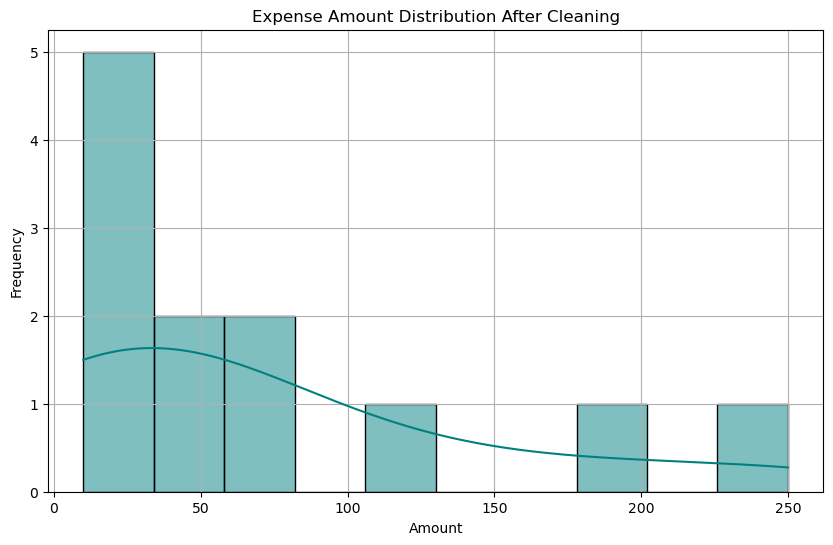

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['Amount'], bins=10, kde=True, color='teal')
plt.title("Expense Amount Distribution After Cleaning")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [12]:
print("\nOriginal dataset shape:", df.shape)
print("After cleaning shape:", df_cleaned.shape)


Original dataset shape: (15, 5)
After cleaning shape: (12, 5)
